# Determine whether staff member at a salon has any effect on the average price for an appointment

*Now that y'all are all pumped up about ANOVAs, it's time to jump into computing them in R. Although you can often use R and Python in the same way, the truth is that each has different strengths that make them better for some things that for others.  R happens to be better at statistics, since it was made by statisticians, for statisticians and data scientists. Thus this module focuses more on R than on Python.*

*Begin by loading the libraries you will need. You will need rcompanion for checking the assumption of normality, and you will use the car library to correct for a violation of homogeneity of variance, should you have one. If you run into any missing data, you will need the package IDPmisc. Lastly, you will need dplyr to easily look at the means for each of the categories if you find significant results.*

## Load Libraries

In [1]:
library("rcompanion")
library("car")
library("dplyr")
library("IDPmisc")

Warning message:
"package 'rcompanion' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following object is masked from 'package:car':

    recode

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'IDPmisc' was built under R version 3.5.3"

## Read in Data

*Now here is the data you will be analyzing.  It is information from a salon about their cancelled appointments.  Although this is not a complete list of appointments, since it doesn't include any of the kept ones, your supervisor would like you to determine how each of the staff members are doing for selling services to the clients.  Specifically, they want to know if the staff member has any bearing on the average amount that a customer spends per appointment.*

In [2]:
salon <- read.csv("C://Users/meredith.dodd/Documents/Data Science/105 Intermediate Statistics/Lesson 3/client_cancellations.csv")

In [3]:
head(salon)

cancel.date,cancel.date.month,code,service.code,service.desc,staff,booking.date,booking.date.month,canceled.by,days.in.adv,avg.price
3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44
3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44
4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41
4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13
4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84
4/3/2018,April,STRH01,CHLFH,Highlights full,KELLY,4/4/2018,April,JJ,1,120.00


*This can easily be answered with an ANOVA. But guess what? You need to run the assumption gauntlet first before you go there. You can start by checking for normality. Go ahead and pull out plotNormalHistogram.* 

## Test Assumptions

### Normality

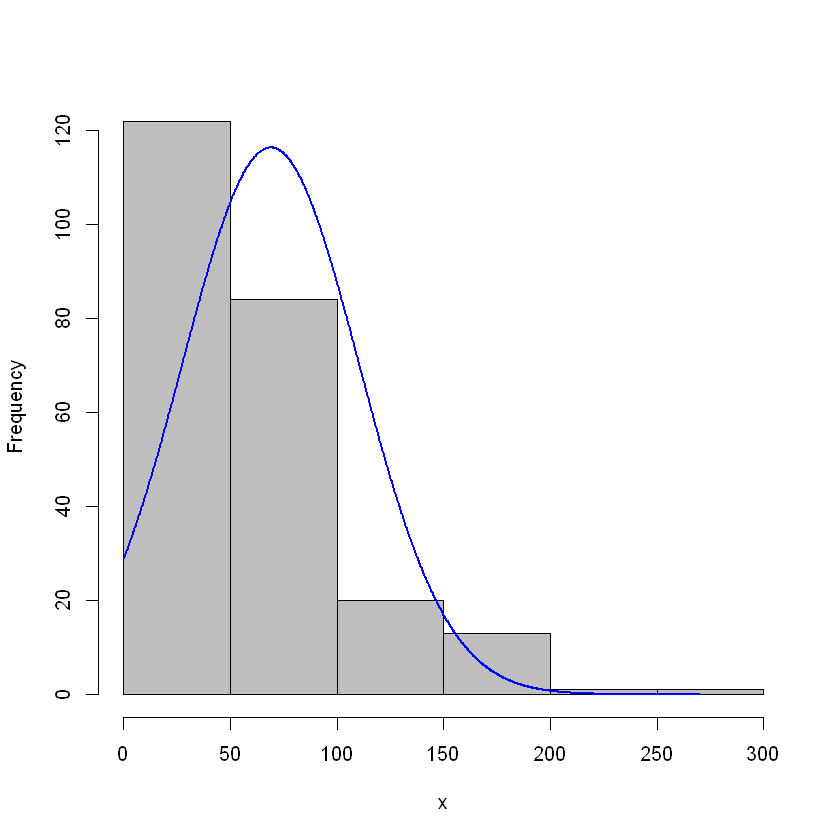

In [4]:
plotNormalHistogram(salon$avg.price)

*Hmmm, it looks like this data is positively skewed. To try and address that, you can try to take the square root.*

In [5]:
salon$avg.priceSQRT <- sqrt(salon$avg.price)

*Then make sure it worked as expected.*

In [6]:
head(salon)

cancel.date,cancel.date.month,code,service.code,service.desc,staff,booking.date,booking.date.month,canceled.by,days.in.adv,avg.price,avg.priceSQRT
3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44,9.404254
3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44,9.404254
4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41,6.435060
4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13,7.945439
4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84,8.236504
4/3/2018,April,STRH01,CHLFH,Highlights full,KELLY,4/4/2018,April,JJ,1,120.00,10.954451


*Alright, it did. Now check to see if it solved your non-parametric issue.*

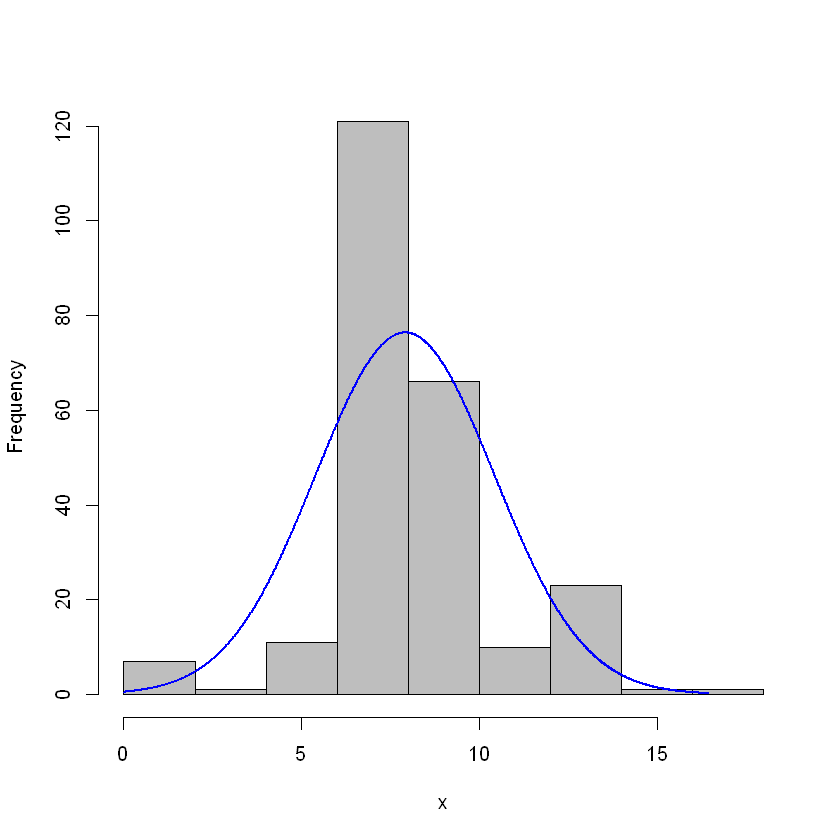

In [7]:
plotNormalHistogram(salon$avg.priceSQRT)

*Aha! Looks like that did, and avg.price is now looking quite spiffy. You have now met the assumption of normality.*

### Homogeneity of Variance

*Next, you will test for the assumption of homogeneity of variance.  There are two ways to go about doing this - with either Bartlett's test or Fligner's test.  Bartlett is for when your data is normally distributed, and Fligner's is for when your data is NOT normally distributed.  You should correctly use Bartlett's test on the square root of average price, since that data is normally distributed, but you will both here to be prepared for any circumstances!*

*In order to do Bartlett's test, which comes from the car package, you will use the function bartlett.test(). Easy enough, right? Just specify your DV, followed by a tilde and your categorical IV, then specify your dataframe with the argument data=*

In [8]:
bartlett.test(avg.priceSQRT ~ staff, data=salon)


	Bartlett test of homogeneity of variances

data:  avg.priceSQRT by staff
Bartlett's K-squared = 55.268, df = 5, p-value = 1.15e-10


*For both bartlett's test and fligner's test, to pass the assumption, you want the results to be non-significant - which goes against everything you've learned thus far and can be a little confusing. But the idea is that if the p value is less than .05 and thus significant, it means that you have found unequal variance, and thus have violated the assumption of homogeneity of variance. You should get relatively similar results if you try fligner's test as well:*

In [9]:
fligner.test(avg.priceSQRT ~ staff, data=salon)


	Fligner-Killeen test of homogeneity of variances

data:  avg.priceSQRT by staff
Fligner-Killeen:med chi-squared = 38.057, df = 5, p-value = 3.676e-07


*And although the p value has changed some, you do find that the end result is the same - still significant.  Therefore, no matter how you slice it, you have violated the assumption of homogeneity of variance.  Luckily enough, however, there is code that can help correct for this violation, so this does not call for an immediate halt to the proceedings.*

### Sample Size

*The assumption of sample size says that you have to have at least 20 cases of data per independent variable. Since you have 244 rows, you have most certainly met this assumption.*

### Independence

*The last assumption is that of independence.  While you cannot test for this, you should think through your independent variable - are any of the staff overlapping in any way, or related? Of course, having just received this data with little detail, you would not know, but hopefully if you were working for the salon you would either be able to answer this question already or ask someone who does. If the answer is no, none of the salon staff overlap, then you have met the assumption of independence. Having prepared your data and tested all your assumptions, you are now free to proceed to actually conducting ANOVAs - which will continue onto the next page.*

# End of Video pg 4

# Determine whether staff member at a salon has any effect on the average price for an appointment

*Welcome back! Now where were you? Ahh yes, you had just completed data wrangling and assumption testing for your first ANOVA in R, which will answer the question of whether or not the staff members at a salon have any effect on the average amount clients spend on appointments.*

*Now believe it or not, there are two ways you could do the same one-way ANOVA in R! The first way you will learn is how to do ANOVAs when you have met the assumption of homogeneity of variance.  Although you didn't acutally meet this assumption, it is good to learn, so it will be covered here.*

*The function is included with the base R, so you don't need any specific library, and is called aov.  You will simply put in your DV, followed by a tilde and your IV.*

In [10]:
salonANOVA <- aov(salon$avg.priceSQRT ~ salon$staff)

*Then call it with the summary function.*

In [11]:
summary(salonANOVA)

             Df Sum Sq Mean Sq F value   Pr(>F)    
salon$staff   5  223.8   44.77    8.11 4.45e-07 ***
Residuals   235 1297.2    5.52                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
2 observations deleted due to missingness

*There is a lot of information contained here, but the most important part to pay attention to really is on the far right - the F value and the p value. Looks like this p value is significant at .001, which means that there is a significant effect of staff members on the average amount that a client spends for an appointment.*

*Go ahead and try the same thing again, but with the second variation of ANOVA, which is meant to correct for a violation of the assumption of homogeneity of variance. It is based on a linear model, using the function lm, which can also be used for regression.  At their heart, both regressions and ANOVAs use the same math - but how they are used and interpreted, and the flow of their output, is very different.*

*Then you can call Anova with a capital A on the linear model, which puts it into an ANOVA format for you instead of a linear regression model. Specify the name of the linear model you just created, then chose a Type (you will learn more about this later), and lastly, make sure the white.adjust argument is set to true. That last part is the most important bit, because the white.adjust is what gives you an ANOVA that will correct for a violation of homogeneity of variance. Without it, you just have done the same ANOVA as before a different way.*

In [12]:
salonANOVAhetero <- lm(avg.priceSQRT ~ staff, data=salon)
Anova(salonANOVAhetero, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()


,Df,F,Pr(>F)
staff,5,5.672684,5.841455e-05
Residuals,235,NA,NA


*The output here is a little less complex, but you still have what you need to know - that there is a significant difference in the amount the client spends per staff member.*

*But which staff member, you might ask? Well, that can be settled with something called a post-hoc.  A post hoc is designed to tell you exactly which levels of your independent variable significantly differ from each other. At it's simplest form, a post hoc is an independent t-test done between each set of levels of your indpendent variable. But say you had ten levels of your independent variable, or even five like you do here? That's an awful lot of t-tests to run.  Wouldn't it be lovely if you could run just one line of code and get all of those t-tests to come back to you in an instant? Well, all your dreams have come true, because you can do just that with a post hoc!*

*Now post hocs can be run unadjusted, or they can be run with corrections for Type I error. It's important to correct for Type I error if you can, because your chances to find something significant when it really shouldn't be increases with the number of tests you do.  So if you're running post hocs, you have additional tests, which increase your bias. To illustrate this point, start off by running a post hoc without any correction at all. The function for that is pairwise.t.test(), and it takes the arguments of your IV, your DV, and p.adjust, which is where you can specify a correction if you'd like. In this case, you'll have p.adjust none to indicate you don't want to control for Type I error at all.*

In [13]:
pairwise.t.test(salon$avg.price, salon$staff, p.adjust="none")


	Pairwise comparisons using t tests with pooled SD 

data:  salon$avg.price and salon$staff 

       BECKY   JJ      JOANNE  KELLY  SINEAD
JJ     0.0188  -       -       -      -     
JOANNE 8.9e-14 1.0e-08 -       -      -     
KELLY  0.0382  0.9788  1.6e-07 -      -     
SINEAD 0.8622  0.1534  8.6e-08 0.1831 -     
TANYA  0.9511  0.4542  0.0038  0.4669 0.9797

P value adjustment method: none 

*And here are your results! Looks like Becky significantly differs from JJ, Joanne, and Kelly in the amount of money her clients bring in per appointment. In addition, Joanne and JJ differ, and so do Kelly and Joanne and Tanya and Joanne.  There are no other significant differences here.*

*But what if you ran it with an adjustment, to correct for Type I error? My favorite is Bonferroni, but you could also put in the p.adjust argument Holm if you wanted.*

In [14]:
pairwise.t.test(salon$avg.price, salon$staff, p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  salon$avg.price and salon$staff 

       BECKY   JJ      JOANNE  KELLY SINEAD
JJ     0.282   -       -       -     -     
JOANNE 1.3e-12 1.6e-07 -       -     -     
KELLY  0.574   1.000   2.4e-06 -     -     
SINEAD 1.000   1.000   1.3e-06 1.000 -     
TANYA  1.000   1.000   0.057   1.000 1.000 

P value adjustment method: bonferroni 

*Now look at how drastically those results have changed.  The only thing that significanlty stands out anymore is that Joanne significantly differs from Becky, JJ, Kelly, Sinead, and very nearly differs from Tanya as well! So things became a lot less significant overall, and the important stuff really stands out.  If you hadn't used a correction, you would have reported false, biased results.*

*Now you may still be unsatisfied with this answer.  You know that Joanne differs from everyone, but HOW does she differ? Is she doing much better or much worse than everyone else? In order to answer that, you need to go back and look at your means. And it's important to look at your unadjusted means, not the means of the column you square rooted, because otherwise things probably won't make much sense.* 

*You can easily drum up a table of means with the summarize function from dplyr.*

In [15]:
salonMeans <- salon %>% group_by(staff) %>% summarize(Mean = mean(avg.price))

In [16]:
salonMeans

staff,Mean
BECKY,51.06459
JJ,NA
JOANNE,108.04244
KELLY,66.13773
SINEAD,52.73368
TANYA,52.22250


*And what's that? NA for JJ? Go ahead and try to remove missing data with the IDPmisc package, using the NaRV.omit function. Then try again.* 

In [17]:
salon2 <- NaRV.omit(salon)

In [18]:
salonMeans <- salon2 %>% group_by(staff) %>% summarize(Mean = mean(avg.price))

In [19]:
salonMeans

staff,Mean
BECKY,51.06459
JJ,66.32559
JOANNE,108.04244
KELLY,66.13773
SINEAD,52.73368
TANYA,52.22250


*It looks like Joanee is outselling everyone! Maybe she works more hours, maybe she has more experience and thus does some of the more advanced techniques like coloring, but if not - best to maximize Joanne and see what her technique is to provide so many clients with such expensive services.*